Рогович Татьяна

# Анализ данных  в Python (политология)
## Визуализация в matplotlib (продолжение)
##### Занятия 10-11 | 5.11.2019

# Графики для категориальных переменных: столбчатые диаграммы, совмещенные столбчатые диаграммы, график рассеяния для категориальных переменных

Тут будем работать по мотивам вот этого блокнота.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

Бдуем работать с датасетом, который подсчитывает количество смертей в фильмах (меотодологию сбора данных можно посмотреть по ссылке выше). Несколько графиков мы рассмотрим на занятии, остальные можно изучить самостоятельно.

Очень часто для того, чтобы получить тот график, который хотим - нужно сделать правильную группировку. С этим тоже тут поработаем.


In [8]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

In [7]:
movies = pd.read_csv('https://raw.githubusercontent.com/rogovich/2019-2020_PolSci_Data_Analysis_in_Python/master/9week_Viz_Matplotlib_Plotly/filmdeathcounts.csv')
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


Для начала нам нужно решить две проблемы - в колонках Genre и Director может быть несколько значений. Давайте подумаем, как их извлечь.
Также создадим две новые переменные - FilmCount c единицами во сех колонках (понадобится потом для графиков) и Body_Count_Min (количество смертей в минуту экранного времени).


In [38]:
movies['Film_Count'] = 1
movies['Body_Count_Min'] = movies['Body_Count'] / movies['Length_Minutes'].astype(float)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


In [96]:
# мы будем работать с итератором iterrows, посмотрим, что он возвращает
for i in movies.iterrows():
    print(i)
    print('____________________')
    print(i[0])
    print('____________________')
    print(i[1])
    print('____________________')

    break

(0, Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                       0.0598291
Name: 0, dtype: object)
____________________
0
____________________
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                     

Теперь давайте попробуем реализовать нашу идею на одном примере.

In [97]:
di = {}
idx = 0
col = 'Genre'
sep='|'

for i in movies.iterrows(): # проходимся по наблюдениям
    d = i[1] # достаем первый объект, в котором хранятся все переменные, кроме индекса 
    print(d)
    print('_____')
    names = d[col].split(sep) # разбиваем колонку жанр по разделителю
    print(names)
    print('_____')
    for name in names:
        c = d.copy() # работаем с копией нашего фильма, чтобы не перезаписать его
        print(c)
        print('_____')
        c[col] = name # меняем в копии значение в колонке Genre
        print(c)
        print('_____')
        di[idx] = c # кладем нашу новую колонку в словарь под текущим индексом
        idx += 1 # обновляем индекс
        print(di)
        print('_____')
        
    break

Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                       0.0598291
Name: 0, dtype: object
_____
['Biography', 'Comedy', 'Drama', 'Music']
_____
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                

In [98]:
pd.DataFrame(di) # как будет выглядеть наш новый датафрейм

,0,1,2,3
Film,24 Hour Party People,24 Hour Party People,24 Hour Party People,24 Hour Party People
Year,2002,2002,2002,2002
Body_Count,7,7,7,7
MPAA_Rating,R,R,R,R
Genre,Biography,Comedy,Drama,Music
Director,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom
Length_Minutes,117,117,117,117
IMDB_Rating,7.3,7.3,7.3,7.3
Film_Count,1,1,1,1
Body_Count_Min,0.0598291,0.0598291,0.0598291,0.0598291


In [99]:
pd.DataFrame(di).transpose() # транспонируем. Отлично, то, что нужно!

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.0598291
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.0598291
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.0598291
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.0598291


Теперь соберем все в функцию. Помним, что будем ее применять к двум колонкам по очереди (режиссер и жанр).

In [10]:
def expand_col(df_src, col, sep='|'):
    di = {}
    idx = 0
    for i in df_src.iterrows():
        d = i[1]
        names = d[col].split(sep)
        for name in names:
            # operate on a copy to not overwrite previous director names
            c = d.copy()
            c[col] = name
            di[idx] = c
            idx += 1

    df_new = pd.DataFrame(di).transpose()
    
    return df_new

In [101]:
movies.shape

(545, 10)

In [18]:
df_genre = expand_col(movies, 'Genre') # а теперь уже датафрейм с обработанными режиссерами, обрабатываем на жанры
df_genre.shape

(1682, 10)

In [19]:
df_genre.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.0598291
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.0598291
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.0598291
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.0598291
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


In [20]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 10 columns):
Film              1682 non-null object
Year              1682 non-null object
Body_Count        1682 non-null object
MPAA_Rating       1682 non-null object
Genre             1682 non-null object
Director          1682 non-null object
Length_Minutes    1682 non-null object
IMDB_Rating       1682 non-null object
Film_Count        1682 non-null object
Body_Count_Min    1682 non-null object
dtypes: object(10)
memory usage: 144.5+ KB


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
Film              545 non-null object
Year              545 non-null int64
Body_Count        545 non-null int64
MPAA_Rating       545 non-null object
Genre             545 non-null object
Director          545 non-null object
Length_Minutes    545 non-null int64
IMDB_Rating       545 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.1+ KB


Наши переменные после обработки функцией распознаются как текстовые. Давайте это исправим.

In [21]:
for col in ['Body_Count', 'Length_Minutes', 'Film_Count', 'Body_Count_Min']:
    df_genre[col] = df_genre[col].astype(float)

In [22]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 10 columns):
Film              1682 non-null object
Year              1682 non-null object
Body_Count        1682 non-null float64
MPAA_Rating       1682 non-null object
Genre             1682 non-null object
Director          1682 non-null object
Length_Minutes    1682 non-null float64
IMDB_Rating       1682 non-null object
Film_Count        1682 non-null float64
Body_Count_Min    1682 non-null float64
dtypes: float64(4), object(6)
memory usage: 144.5+ KB


Обратите внимание, что мы работаем с таким датасетом, где один и тот же фильм может встречаться несколько раз (это связано с тем, что он может относиться к нескольким жанрам или имеет несколько режиссеров - эта информация добавляет дополнительные ряды). Поэтому при некоторых агрегациях будем выкидывать дубликаты из колонки Film, чтобы не было задвоения.

In [109]:
movies.shape # размер оригинального датафрейма

(1751, 10)

In [110]:
movies.drop_duplicates('Film').shape # размер датафрейма для уникальных фильмов

(537, 10)

Давайте сгруппируем фильмы по году и суммируем значения для того, чтобы построить столбчатый график.

## Агрегация по годам. Столбчатый график

Давайте построим два столбчатых графика, которые показывают количество фильмов за каждый год и общее количество смертей на экране.

In [23]:
movies_year = movies.groupby('Year').sum()

In [24]:
movies_year.tail()

,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Year,,,,,
2007,4095,5475,327.8,48,35.992220
2008,1785,2850,170.9,26,16.522174
2009,605,1235,75.3,11,5.708305
2010,519,463,29.0,4,4.528441
2013,156,119,6.5,1,1.310924


Text(0.5,1,'Total Body Count')

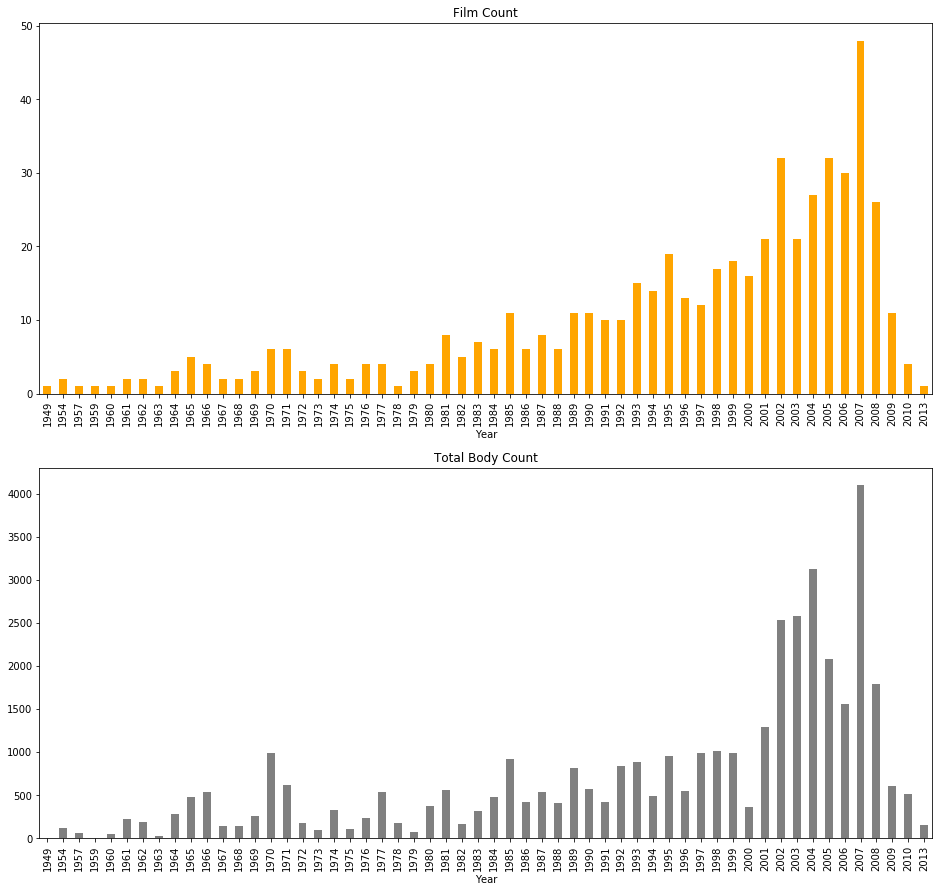

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

# обратите внимание, что здесь меняем синтаксис - делаем график, применяем метод plot из пандас к колонке. 
# И уже в параметрах этого метода прописываем тип графика и ось координат, на которую хотим его положить. 
# При таком подходе у нас каждый год отобразится на оси координат

movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color = '#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color = 'grey')
ax[1].set_title('Total Body Count')

## Агрегация по фильмам. Сортировка по значения. Горизонтальный столбчатый график

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [26]:
movies_film = movies.set_index('Film') # агрегируем и делаем индексом название фильма, так как индекс станет шкалой
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


In [27]:
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10) # сортируем и берем 10 последних значений

Film
King Arthur                              378
Windtalkers                              389
Lord of the Rings: Two Towers            468
A Fistful of Dynamite                    471
The Last Samurai                         558
Troy                                     572
Tae Guk Gi: The Brotherhood of War       590
300                                      600
Kingdom of Heaven                        610
Lord of the Rings: Return of the King    836
Name: Body_Count, dtype: int64

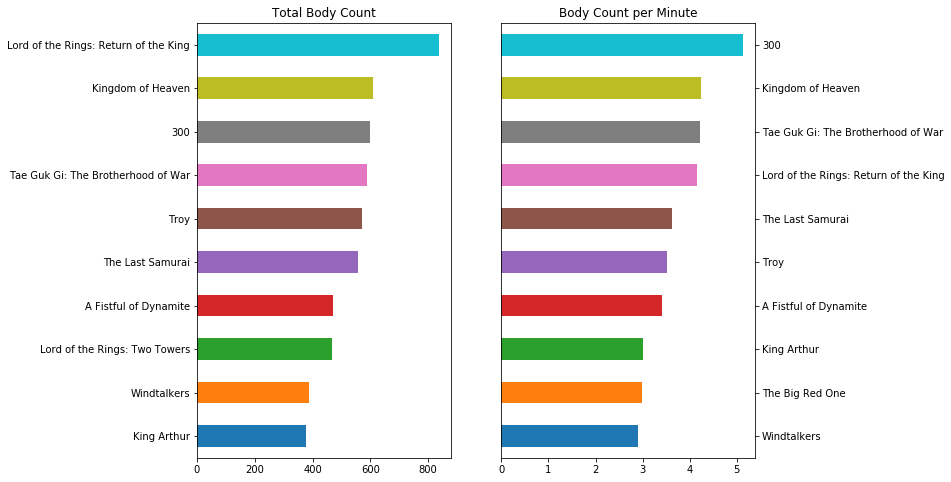

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# график для количества убитых людей в фильме. Горизонтальный график делаем параметром barh (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(kind='barh', ax=ax[0]) 
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(kind='barh', ax=ax[1]) # для количества убитых людей на минуту фильма

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически


# Рейтинги: график рассеяния для категориальной переменной

Графики рассеяния для категориальных переменных тоже имеют место быть. В данном случае у нас будет категориальная переменная по x (буквенный рейтинг фильма). Такой график помогает нам увидеть разброс значений в рамках категорий, а также некоторые корелляции и зависимости. Не забывайте только добавлять прозрачность, потому что в случае категориальных переменных большое количество точек может накладываться друг на друга.


In [29]:
movies['MPAA_Rating'].value_counts()

R           338
PG-13       118
PG           35
Unrated      28
Approved      9
M             5
GP            4
X             4
G             3
NR            1
Name: MPAA_Rating, dtype: int64

**Упражнение:**
    
Постройте график рассеяния для MPAA_Rating по шкале x, Body_Count_Min по y и в качестве размера точки возьмите абсолютное значение Body Count.

Text(0,0.5,'Body count per minute')

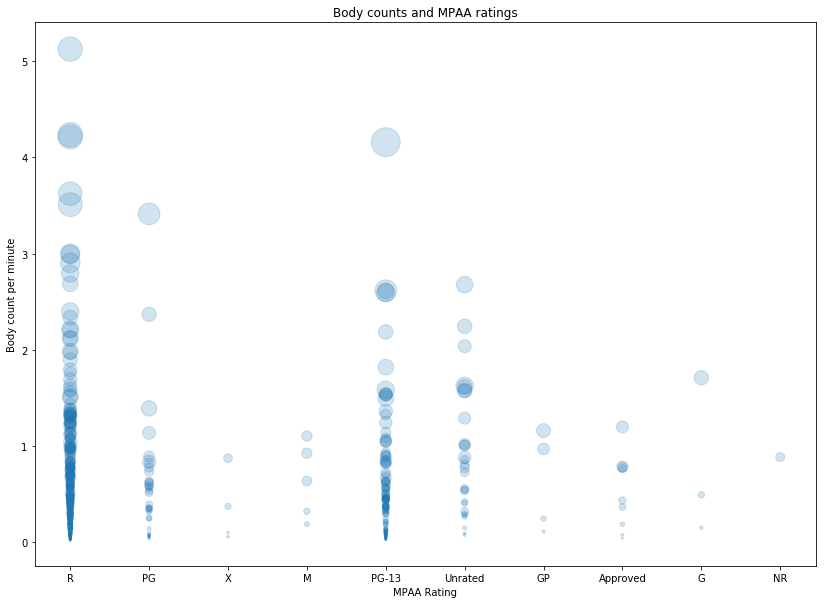

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['MPAA_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.2)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Body count per minute')


Проинтерпретируйте график.

Так же для работы с такими данными могут понадобиться такие графики, как swarmplot (например, есть в библиотеке seaborn). В таком графике столбец переменной немного расширен, что позволяет точкам немного распределиться по горизонтали.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

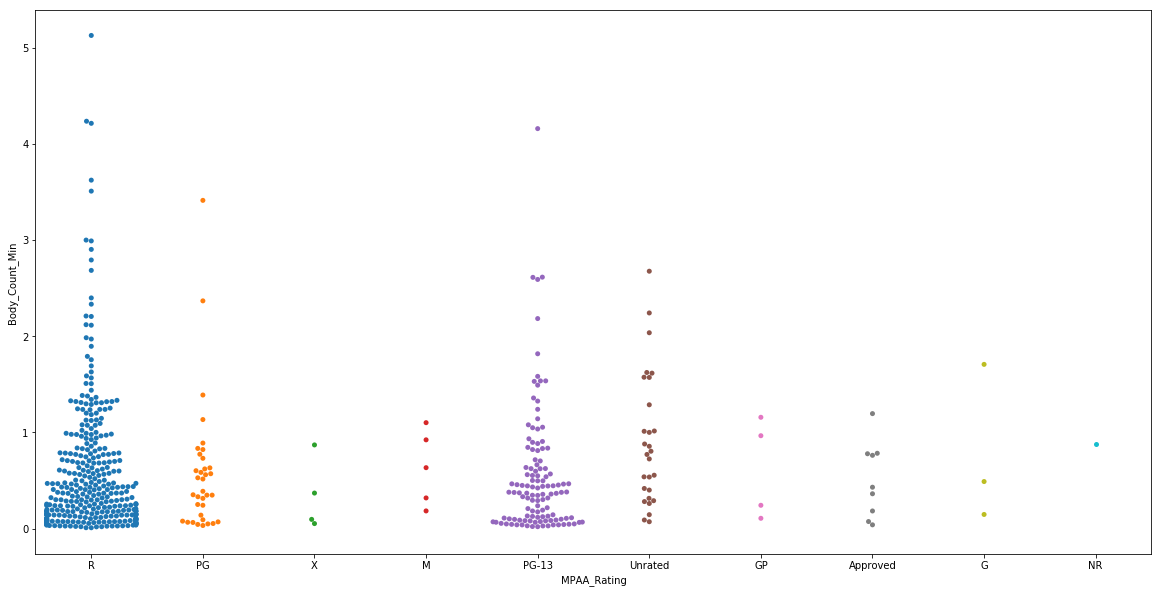

In [31]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize = (20,10))

sns.swarmplot(movies['MPAA_Rating'], movies['Body_Count_Min'])

# Рейтинги: график рассеяния, подписываем фильмы

Давайте построим график рассеяния для рейтинга imbd и body count per minute. А так же подпишем значения для трех самых жестоких фильмов.

In [32]:
movies.sort_values(by=['Body_Count'], ascending=False).head(3) # находим три самых жестоких фильма


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
241,Lord of the Rings: Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,201,8.9,1,4.159204
217,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,144,7.1,1,4.236111
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


In [33]:
bc_top = movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # сохраним датафрейм из трех фильмов
annotations = []
for r in range(len(bc_top)): # сделаем цикл, который сложит нам в список тройки "название фильма - рейтинг - количество убийств на минуту фильма"
    annotations.append([bc_top['Film'].iloc[r], bc_top['IMDB_Rating'].iloc[r], bc_top['Body_Count_Min'].iloc[r]])
annotations

[['Lord of the Rings: Return of the King', 8.9, 4.159203980099503],
 ['Kingdom of Heaven', 7.1, 4.236111111111111],
 ['300', 7.7, 5.128205128205129]]

**Упражнение:**

Сделайте график рассеяния для рейтинга imdb по x, body count per minute для y, и body count для размера точки. Если не успеваем - посмотрите дома самостоятельно, как сделать подписи.

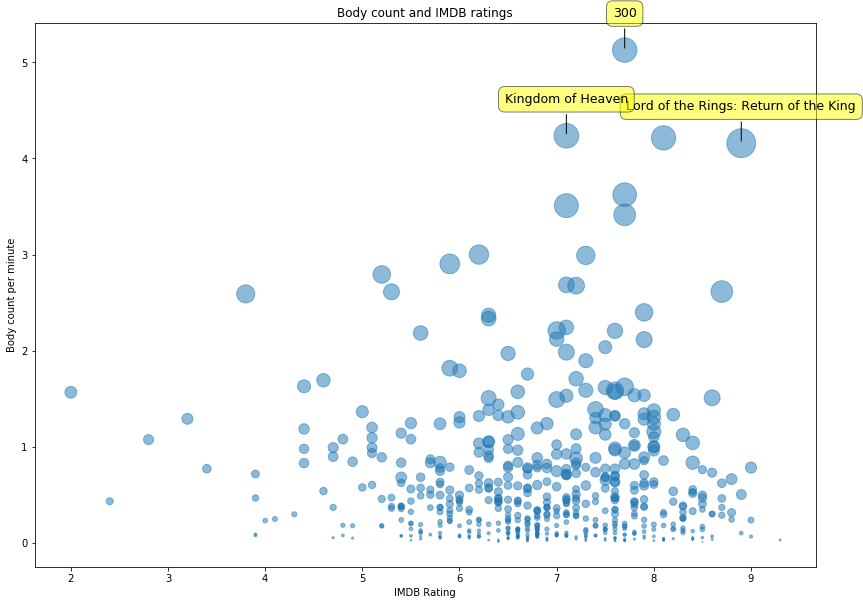

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['IMDB_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations: # идем в наш список с тремя фильмами и итерируемся по нему
    plt.annotate(   # функция, которая подпишет наблюдения в нашем графики
        annotation, # обращаемся к названию фильма
        xy=(x, y),  # задаем координаты точек
        xytext=(0, 30), # задаем координаты текста (смещение на 30 единиц вверх по y)
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))

## Делаем совмещенные столбчатые диграммы из агрегированных данных

А теперь давайте посмотрим как передавать в функцию группировки несколько функций.

In [42]:
group_year = movies.groupby('Year').agg([np.mean, np.median])
group_year.head()

Body_Count        Length_Minutes        IMDB_Rating        Film_Count  \
           mean median           mean median        mean median       mean   
Year                                                                         
1949        4.0    4.0          104.0  104.0         8.4    8.4          1   
1954       57.5   57.5          150.0  150.0         8.2    8.2          1   
1957       67.0   67.0           88.0   88.0         8.5    8.5          1   
1959        7.0    7.0           79.0   79.0         3.9    3.9          1   
1960       55.0   55.0          128.0  128.0         7.8    7.8          1   

            Body_Count_Min            
     median           mean    median  
Year                                  
1949      1       0.038462  0.038462  
1954      1       0.425822  0.425822  
1957      1       0.761364  0.761364  
1959      1       0.088608  0.088608  
1960      1       0.429688  0.429688

In [43]:
bc = group_year['Body_Count']
bc.head()

,mean,median
Year,,
1949,4.0,4.0
1954,57.5,57.5
1957,67.0,67.0
1959,7.0,7.0
1960,55.0,55.0


In [44]:
bc_min = group_year['Body_Count_Min']
bc_min.head()

,mean,median
Year,,
1949,0.038462,0.038462
1954,0.425822,0.425822
1957,0.761364,0.761364
1959,0.088608,0.088608
1960,0.429688,0.429688


Text(0.5,1,'Body Count by Minute')

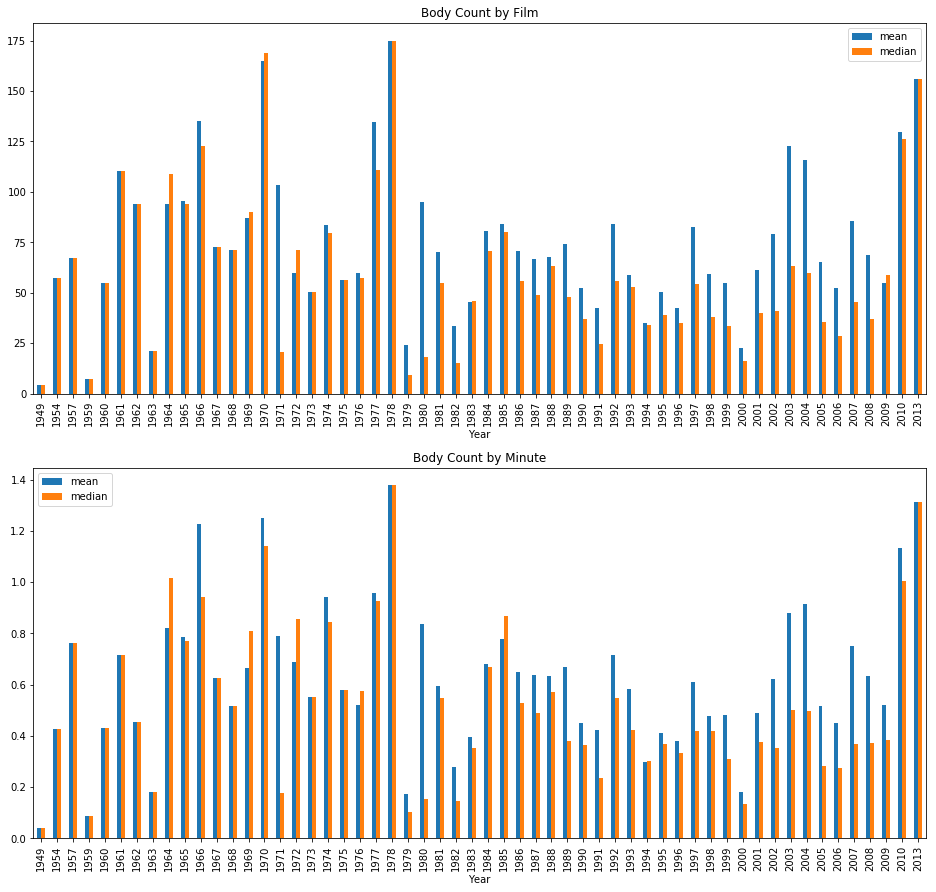

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

bc.plot(kind='bar', ax=ax[0])
ax[0].set_title('Body Count by Film')

bc_min.plot(kind='bar', ax=ax[1])
ax[1].set_title('Body Count by Minute')
  

## Упражнение: по аналогии с фильмами найдите самых жестоких режиссеров

In [46]:
movies_dir = movies.groupby('Director').sum().sort_values(by=['Body_Count']).tail(10)

In [47]:
movies_dir

,Year,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Director,,,,,,
Je-kyu Kang,2004,590,140,8.1,1,4.214286
Steven Spielberg,17965,707,1271,70.1,9,4.864878
Antoine Fuqua,10025,711,577,32.3,5,5.885269
Sergio Leone,7866,748,530,33.0,4,5.614844
Ridley Scott,11975,781,810,45.9,6,5.434938
Zack Snyder,6020,808,380,22.7,3,6.900543
Wolfgang Petersen,7988,889,534,27.5,4,6.457219
Edward Zwick,5998,1003,419,23.6,3,7.045823
John Woo,19930,1500,1181,69.9,10,12.307650


In [48]:
movies_dir_mean = movies_dir.groupby('Director').mean().sort_values(by=['Body_Count_Min']).tail(10)
movies_dir_mean

,Year,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Director,,,,,,
Je-kyu Kang,2004,590,140,8.1,1,4.214286
Steven Spielberg,17965,707,1271,70.1,9,4.864878
Ridley Scott,11975,781,810,45.9,6,5.434938
Sergio Leone,7866,748,530,33.0,4,5.614844
Antoine Fuqua,10025,711,577,32.3,5,5.885269
Wolfgang Petersen,7988,889,534,27.5,4,6.457219
Zack Snyder,6020,808,380,22.7,3,6.900543
Edward Zwick,5998,1003,419,23.6,3,7.045823
Peter Jackson,10003,1517,849,41.3,5,8.251953


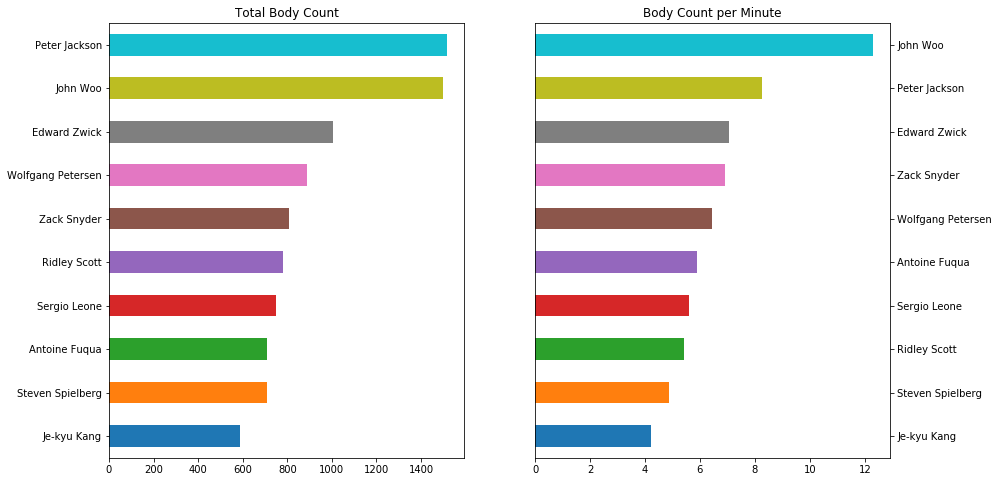

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

movies_dir['Body_Count'].plot(kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_dir_mean['Body_Count_Min'].plot(kind='barh', ax=ax[1])
ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

## Агрегация по жанрам (подсчет абсолютных значений и самые высокие средние значения)

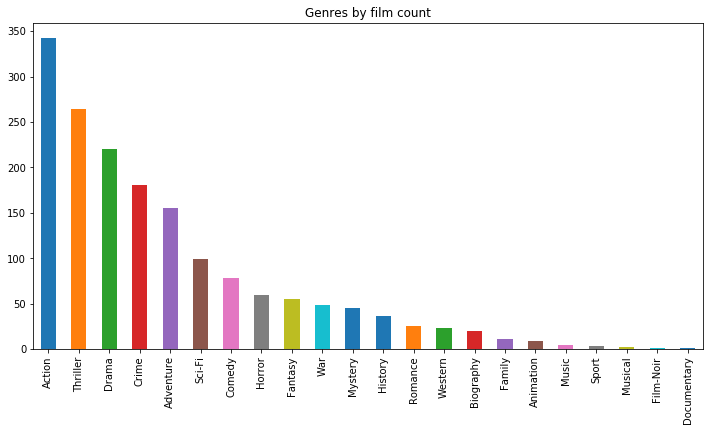

In [50]:
df_genre['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), title='Genres by film count')


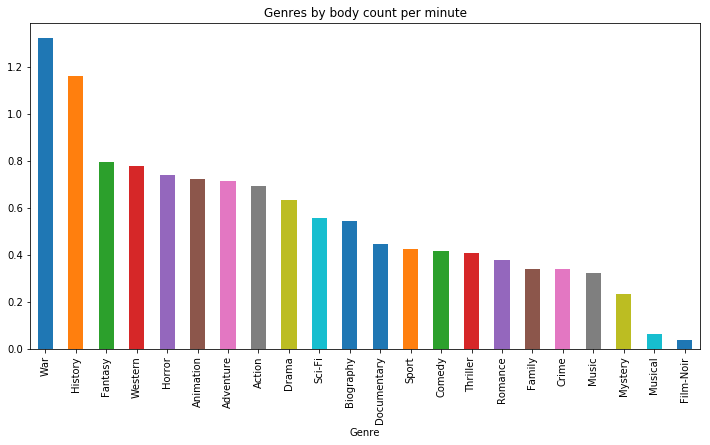

In [51]:
df_genre.groupby('Genre').mean().sort_values(by=['Body_Count_Min'], ascending=False)['Body_Count_Min'].plot(kind='bar', figsize=(12, 6), title='Genres by body count per minute')